### **Flight Price Prediction (EDA + Feature Engineering)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_final = pd.concat([df_train, df_test], ignore_index=True)
df_final.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
df_final.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13353,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [8]:
df_final['Date'] = df_final['Date_of_Journey'].str.split('/').str[0]
df_final['Month'] = df_final['Date_of_Journey'].str.split('/').str[1]
df_final['Year'] = df_final['Date_of_Journey'].str.split('/').str[2]

In [9]:
df_final.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [10]:
df_final.drop('Date_of_Journey', inplace=True, axis=1)

In [11]:
df_final.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  object 
 11  Month            13354 non-null  object 
 12  Year             13354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


In [13]:
df_final['Date'] = df_final['Date'].astype(int)
df_final['Month'] = df_final['Month'].astype(int)
df_final['Year'] = df_final['Year'].astype(int)

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.3+ MB


In [15]:
print(df_final.columns.tolist())

['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month', 'Year']


In [16]:
df_final['Arrival_Time'] = df_final['Arrival_Time'].str.split(' ').str[0]

In [17]:
df_final.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
df_final.isnull().sum()

,0
Airline,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0
Price,2671


In [19]:
df_final['Arrival_Hour'] = df_final['Arrival_Time'].str.split(':').str[0]
df_final['Arrival_Min'] = df_final['Arrival_Time'].str.split(':').str[1]

In [20]:
df_final.drop('Arrival_Time', inplace=True, axis=1)

In [21]:
df_final.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15


In [22]:
df_final['Dep_hour'] = df_final['Dep_Time'].str.split(':').str[0]
df_final['Dep_min'] = df_final['Dep_Time'].str.split(':').str[1]
df_final.drop('Dep_Time', inplace=True, axis=1)

In [23]:
df_final['Dep_hour'] = df_final['Dep_hour'].astype(int)
df_final['Dep_min'] = df_final['Dep_min'].astype(int)

In [24]:
df_final.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [25]:
df_final['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
df_final['Total_Stops'] = df_final['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, 'nan':1, '4 stops':4})

In [27]:
df_final.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [29]:
df_final['Airline'] = ohe.fit_transform(df_final['Airline'].values.reshape(-1,1)).toarray()
df_final['Source'] = ohe.fit_transform(df_final['Source'].values.reshape(-1,1)).toarray()
df_final['Destination'] = ohe.fit_transform(df_final['Destination'].values.reshape(-1,1)).toarray()
df_final['Additional_Info'] = ohe.fit_transform(df_final['Additional_Info'].values.reshape(-1,1)).toarray()

In [30]:
df_final.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,0.0,1.0,0.0,BLR → DEL,2h 50m,0.0,0.0,3897.0,24,3,2019,01,10,22,20
1,0.0,0.0,1.0,CCU → IXR → BBI → BLR,7h 25m,2.0,0.0,7662.0,1,5,2019,13,15,5,50


In [31]:
df_final.drop('Duration', inplace=True, axis=1)

In [32]:
df_final.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,0.0,1.0,0.0,BLR → DEL,0.0,0.0,3897.0,24,3,2019,01,10,22,20
1,0.0,0.0,1.0,CCU → IXR → BBI → BLR,2.0,0.0,7662.0,1,5,2019,13,15,5,50


In [33]:
pd.get_dummies(df_final, columns=['Airline', 'Source', 'Destination', 'Additional_Info'], drop_first=True)

,Route,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min,Airline_1.0,Source_1.0,Destination_1.0,Additional_Info_1.0
0,BLR → DEL,0.0,3897.0,24,3,2019,01,10,22,20,False,True,False,False
1,CCU → IXR → BBI → BLR,2.0,7662.0,1,5,2019,13,15,5,50,False,False,True,False
2,DEL → LKO → BOM → COK,2.0,13882.0,9,6,2019,04,25,9,25,False,False,False,False
3,CCU → NAG → BLR,1.0,6218.0,12,5,2019,23,30,18,5,False,False,True,False
4,BLR → NAG → DEL,1.0,13302.0,1,3,2019,21,35,16,50,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,CCU → DEL → BLR,1.0,NaN,6,6,2019,20,25,20,30,False,False,True,False
13350,CCU → BLR,0.0,NaN,27,3,2019,16,55,14,20,False,False,True,False
13351,DEL → BOM → COK,1.0,NaN,6,3,2019,04,25,21,50,False,False,False,False
13352,DEL → BOM → COK,1.0,NaN,6,3,2019,19,15,4,0,False,False,False,False


In [35]:
# Data overview
print("Dataset Shape:", df_final.shape)
print("\nMissing Values:\n", df_final.isnull().sum())
print("\nDuplicates:", df_final.duplicated().sum())
print("\nBasic Stats for Price:\n", df_train['Price'].describe())

# Unique values for categoricals
print("\nUnique Airlines:", df_final['Airline'].nunique())
print("Unique Routes:", df_final['Route'].nunique())

Dataset Shape: (13354, 14)

Missing Values:
 Airline               0
Source                0
Destination           0
Route                 1
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Min           0
Dep_hour              0
Dep_min               0
dtype: int64

Duplicates: 337

Basic Stats for Price:
 count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Unique Airlines: 2
Unique Routes: 132


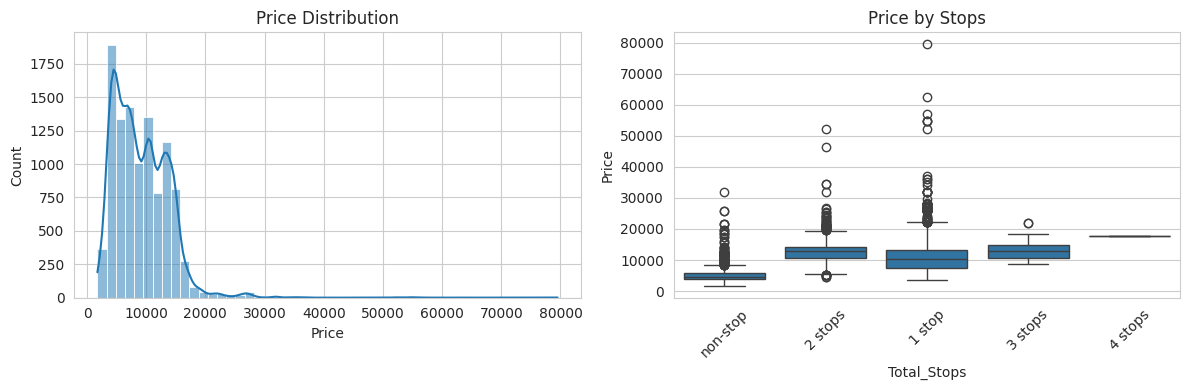

In [37]:
sns.set_style("whitegrid")

# Price distribution (train only)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_train['Price'], bins=50, kde=True)
plt.title('Price Distribution')

# Boxplot: Price by Total_Stops
plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, x='Total_Stops', y='Price')
plt.title('Price by Stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df_final.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_hour,Dep_min
0,0.0,1.0,0.0,BLR → DEL,0.0,0.0,3897.0,24,3,2019,01,10,22,20
1,0.0,0.0,1.0,CCU → IXR → BBI → BLR,2.0,0.0,7662.0,1,5,2019,13,15,5,50


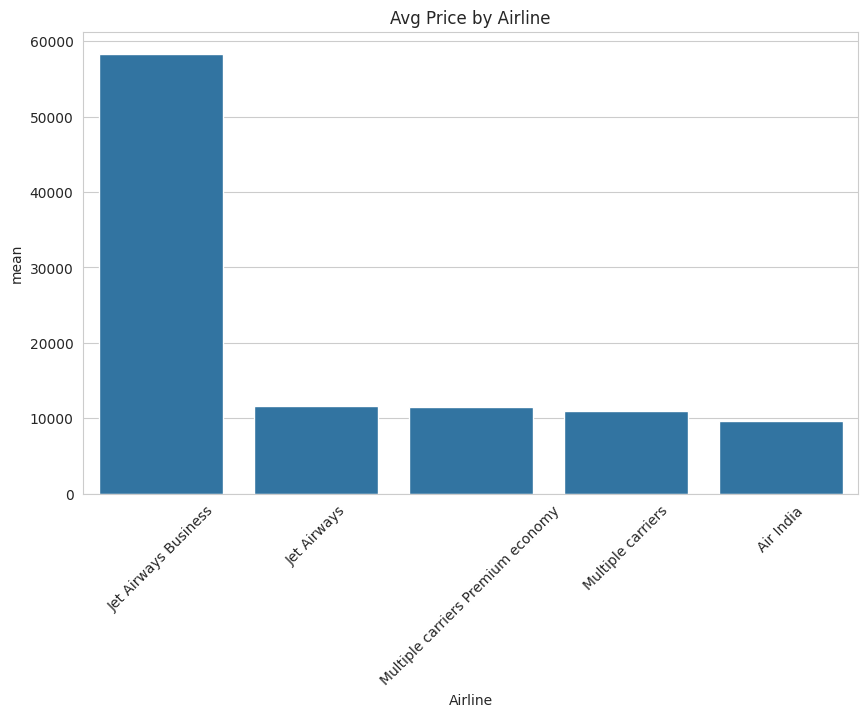

In [42]:
# Price by Airline (top 5)
plt.figure(figsize=(10, 6))
top_airlines = df_train.groupby('Airline')['Price'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(5)
sns.barplot(data=top_airlines.reset_index(), x='Airline', y='mean')
plt.title('Avg Price by Airline')
plt.xticks(rotation=45)
plt.show()
